In [1]:
import torch
import numpy as np
import torch.nn as nn
from random import randint,shuffle,uniform
import matplotlib.pyplot as plt

In [2]:
def actual_function_analytic(x):
    return 2*x**2+3

In [3]:
x_train=[]
y_train=[]
X=-1
while X<1:
    x_train.append(X)
    y_train.append(actual_function_analytic(X))
    X+=0.0002

index = [i for i in range(len(y_train))]
shuffle(index)
for i in range(len(y_train)):
    x_train[i] = x_train[index[i]]
    y_train[i] = y_train[index[i]]+uniform(-0.02,0.02)
    
x_test=[]
y_test=[]
X=-1.0001
while X<1:
    x_test.append(X)
    y_test.append(actual_function_analytic(X))
    X+=0.0002

index = [i for i in range(len(y_test))]
shuffle(index)
for i in range(len(y_test)):
    x_test[i] = x_test[index[i]]
    y_test[i] = y_test[index[i]]
    
(x_eval,y_eval)=(x_train[:len(x_train)//20],y_train[:len(x_train)//20])
(x_train,y_train)=(x_train[len(x_train)//20:],y_train[len(x_train)//20:])

x_train=torch.Tensor(x_train)
y_train=torch.Tensor(y_train)
x_test=torch.Tensor(x_test)
y_test=torch.Tensor(y_test)
x_eval=torch.Tensor(x_eval)
y_eval=torch.Tensor(x_eval)

In [4]:
def forward(x,w1,b1,w2,b2):
    #隐藏层前向计算
    h1=torch.matmul(x,w1)+b1
    h1=torch.relu(h1)
    #输出层前向计算
    h2=torch.matmul(h1,w2)+b2
    return h2

In [5]:
def initialize_group():
    chrome=torch.randn([NG,C_length])
    return chrome

In [6]:
def decode_to_param(chrome):
    #隐藏层张量
    w1=torch.reshape(chrome[:10],[1,10])
    b1=chrome[10:20]
    #输出层张量
    w2=torch.reshape(chrome[20:30],[10,1])
    b2=torch.reshape(chrome[-1],[1])

    w1.requires_grad_(True)
    b1.requires_grad_(True)
    w2.requires_grad_(True)
    b2.requires_grad_(True)
    
    return w1,b1,w2,b2

In [7]:
def best_to_param(chrome):
    #隐藏层张量
    w1=torch.reshape(chrome[:10],[1,10])
    b1=chrome[10:20]
    #输出层张量
    w2=torch.reshape(chrome[20:30],[10,1])
    b2=torch.reshape(chrome[-1],[1])
    print ([w1,b1,w2,b2])
    return w1,b1,w2,b2

In [8]:
def train(x,y,w1,b1,w2,b2):
    criterion=nn.MSELoss()
    optimizer = torch.optim.SGD([w1,b1,w2,b2], lr=0.01)

    for step in range(201):
        if step:
            optimizer.zero_grad()#清空梯度记录
            loss.backward()#计算权重梯度并记录
            optimizer.step()#更新权重
        o=forward(torch.reshape(x,[len(x),1]),w1,b1,w2,b2)
        loss=criterion(o,torch.reshape(y,[len(y),1]))
    return 1/loss

In [9]:
def F_fitness(w1,b1,w2,b2):
    batch_size=20
    index=[randint(0,y_train.size(dim=0)-1) for i in range(batch_size)]
    shuffle(index)
    x=x_train[index[0:batch_size]]
    y=y_train[index[0:batch_size]]
    return train(x,y,w1,b1,w2,b2)

In [10]:
def evaluate_group(group):
    score=[]
    for chrome in group:
        w1,b1,w2,b2=decode_to_param(chrome)
        s=F_fitness(w1,b1,w2,b2)
        score.append(s)
    return score

In [11]:
def roulette_pick(group,s):
    p=uniform(0,1)
    for i in range(len(s)):
        if p<s[i]:return group[i]
    return group[len(s)-1]

In [12]:
def select(group,score):
    new_group=[]
    norm_score=[score[i]/sum(score) for i in range(len(score))]
    norm_score_cum=np.cumsum(norm_score)
    for i in range(len(group)):
        new_group.append(roulette_pick(group,norm_score_cum))
    return new_group

In [13]:
def crossover(group):
    for i in range(0,len(group),2):
        p=uniform(0,1)
        if p<PC:
            place=randint(0,C_length-1)
            group[i],group[i+1]=torch.concat([group[i][:place],group[i+1][place:]],dim=0),\
                                torch.concat([group[i+1][:place],group[i][place:]],dim=0)

In [14]:
def mutation(group):
    for i in range(len(group)):
        p=uniform(0,1)
        if p<PM:
            place=randint(0,C_length-1)
            group[i]=torch.concat([group[i][:place],
                                  torch.reshape(group[i][place]+uniform(-5,5),[1]),
                                  group[i][place+1:]],
                             dim=0)

In [15]:
def elitist(group,score,elit,elit_score):
    index=score.index(max(score))
    if score[index]>elit_score: return group[index],score[index]
    else:                       return elit,elit_score

In [16]:
def elit_replace(group,score,elit,elit_score):
    index=score.index(min(score))
    group[index],score[index]=elit,elit_score

In [17]:
#遗传算法全局变量定义区
PM=0.01
PC=0.1
NG=50
Generate=30
C_length=31

In [18]:
def in_and_out(chrome):
    w1,b1,w2,b2=best_to_param(chrome)
    plt.figure()
    plt.plot(x_train,y_train,'bo')
    o=forward(torch.reshape(x_test,[len(x_test),1]),w1,b1,w2,b2)
    plt.plot(x_test,o,'ro')

tensor(422.7126, grad_fn=<MulBackward0>) tensor(96.4931, grad_fn=<DivBackward0>)
tensor(479.7527, grad_fn=<MulBackward0>) tensor(203.7454, grad_fn=<DivBackward0>)
tensor(600.4076, grad_fn=<MulBackward0>) tensor(267.8705, grad_fn=<DivBackward0>)
tensor(1202.0035, grad_fn=<MulBackward0>) tensor(346.9728, grad_fn=<DivBackward0>)
tensor(1243.9945, grad_fn=<MulBackward0>) tensor(511.8801, grad_fn=<DivBackward0>)
tensor(2671.9080, grad_fn=<MulBackward0>) tensor(715.4782, grad_fn=<DivBackward0>)
tensor(2671.9080, grad_fn=<MulBackward0>) tensor(806.8674, grad_fn=<DivBackward0>)
tensor(2671.9080, grad_fn=<MulBackward0>) tensor(953.9383, grad_fn=<DivBackward0>)
tensor(2994.3289, grad_fn=<MulBackward0>) tensor(1167.6174, grad_fn=<DivBackward0>)
tensor(3834.2454, grad_fn=<MulBackward0>) tensor(1273.3964, grad_fn=<DivBackward0>)
tensor(3834.2454, grad_fn=<MulBackward0>) tensor(1145.2684, grad_fn=<DivBackward0>)
tensor(3834.2454, grad_fn=<MulBackward0>) tensor(1197.4988, grad_fn=<DivBackward0>)
tens

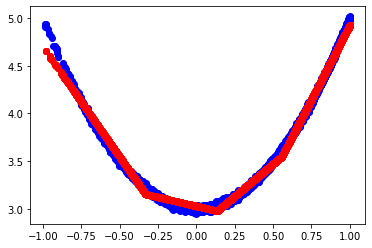

In [19]:
def GA():
    group=initialize_group()
    score=evaluate_group(group)
    elit_score=0
    elit=0
    for i in range(Generate):
        elit,elit_score=elitist(group,score,elit,elit_score)
        group=select(group,score)#Group是一个张量列表
        crossover(group)
        mutation(group)
        score=evaluate_group(group)
        elit_replace(group,score,elit,elit_score)
        print(max(score),sum(score)/len(score))
    best_chrome=group[score.index(elit_score)]
    in_and_out(best_chrome)
GA()